<a href="https://colab.research.google.com/github/Ashu-Dawre/Web-Scraping/blob/main/Copy_of_Numerical_Programming_in_Python_Analyze_it_Yourself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

file = open('linkedinjobs.csv', 'a', newline='', encoding='utf-8')
writer = csv.writer(file)
writer.writerow(['Title', 'Company', 'Location', 'Description', 'Salary'])

def extract_text(element):
    return element.text.strip() if element else ''

def linkedin_scraper(webpage, page_number):
    next_page = webpage + str(page_number)
    print(str(next_page))
    response = requests.get(str(next_page))
    soup = BeautifulSoup(response.content, 'html.parser')

    jobs = soup.find_all('div', class_='base-card relative w-full hover:no-underline focus:no-underline base-card--link base-search-card base-search-card--link job-search-card')


    for job in jobs:

        job_title = extract_text(job.find('h3', class_='base-search-card__title'))
        job_company = extract_text(job.find('h4', class_='base-search-card__subtitle'))
        job_location = extract_text(job.find('span', class_='job-search-card__location'))
        job_link = job.find('a', class_='base-card__full-link')['href']
        # Fetch detailed job page
        job_response = requests.get(job_link)
        job_soup = BeautifulSoup(job_response.content, 'html.parser')

        # Extract additional details if available
        job_description = extract_text(job_soup.find('section', class_='description'))
        job_salary = extract_text(job.find('span', class_='job-search-card__salary-info'))
        #job_deadline = extract_text(job_soup.find('span', class_='job-search-card__listdate'))

        writer.writerow([job_title, job_company, job_location, job_description, job_salary])

    print('Data updated')

    if page_number < 25:
        page_number += 25
        linkedin_scraper(webpage, page_number)
    else:
        file.close()
        print('File closed')

linkedin_scraper('https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%20Science&location=San%20Francisco%20Bay%20Area&geoId=90000084&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0&start=', 0)


https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%20Science&location=San%20Francisco%20Bay%20Area&geoId=90000084&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0&start=0
Data updated
https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%20Science&location=San%20Francisco%20Bay%20Area&geoId=90000084&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0&start=25
Data updated
File closed


In [ ]:
import pandas as pd
df = pd.read_csv("/content/linkedinjobs.csv")
df

,Title,Company,Location,Description,Salary
0,Data Science Graduate,Hewlett Packard Enterprise,"San Jose, CA","This role has been designated as ‘Edge’, which...",NaN
1,Neuroscientist,Lee Lab at Stanford,"Stanford, CA",Do you want to pursue independent research in ...,NaN
2,Artificial Intelligence (AI)/Machine Learning ...,Hewlett Packard Enterprise,"San Jose, CA","This role has been designated as ‘Office’, whi...",NaN
3,Data Scientist,Experfy,"San Francisco, CA",The successful candidate will have a strong ba...,NaN
4,Data Scientists Assistant Inter,Syngenta,"Gilroy, CA",Company DescriptionSyngenta is a global leader...,NaN
5,"Data Scientist, Growth",Pagoda,"San Francisco, CA",About PagodaPagoda is shepherding a future whe...,NaN
6,Data Science - Future Collaborators!,Seer,"Redwood City, CA","At Seer, we are passionate about empowering ou...",NaN
7,Dream Job,Climax Foods,"Berkeley, CA","$60k-100k Dependent on education, experience a...",NaN
8,Computational Neuroscientist,Sonera,"Berkeley, CA",Sonera is building state-of-the-art magnetic s...,NaN
9,ML Engineer,SysMind,"Pleasanton, CA",Job TitleML EngineerRelevant Experience(in Yrs...,NaN


In [ ]:
# dictionary to store the keyword-category mappings
keyword_categories = {
    'Data Scientist': 'Data Scientist',
    'Engineer': 'Engineer',
    'Analyst': 'Analyst',
    'Graduate': 'Graduate',
    'Intern': 'Intern'
}

title_category_dict = {}

# function to categorize job titles based on keywords
def categorize_title(Title):
    for keyword, category in keyword_categories.items():
        if keyword in Title:
            return category
    return 'Other'  # If none of the keywords match, categorize as 'Other'


for Title in df['Title']:
    category = categorize_title(Title)
    if category not in title_category_dict:
        title_category_dict[category] = []
    title_category_dict[category].append(Title)

print(title_category_dict)

{'Analyst': ['Business Analyst', 'Data Analyst', 'Data Analyst : A/B-tests and customer onboarding (Remote)', 'Financial Analyst - Early Career'], 'Data Scientist': ['AI/ML - Sr Data Scientist, AI/ML Data', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Data Scientist - NLP', 'Data Scientist Intern', 'Data Scientist and Data Manager', 'Data Scientist, Growth', 'Data Scientist, Mid Level', 'Data Scientists Assistant Inter', 'Entry Level Data Scientist', 'Experimentation Data Scientist', 'Hiring for Data Scientist || Sunnyvale, CA || Remote || Full-Time', 'ML Data Scientist', 'Machine Learning Data Scientist', 'Senior Data Scientist', 'Senior Data Scientist', 'Senior Data Scientist', 'Senior Data Scientist (US Remote)'], 'Engineer': ['Jr. Machine Learning Engineer', 'ML Engineer', 'ML Engineer', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Machi

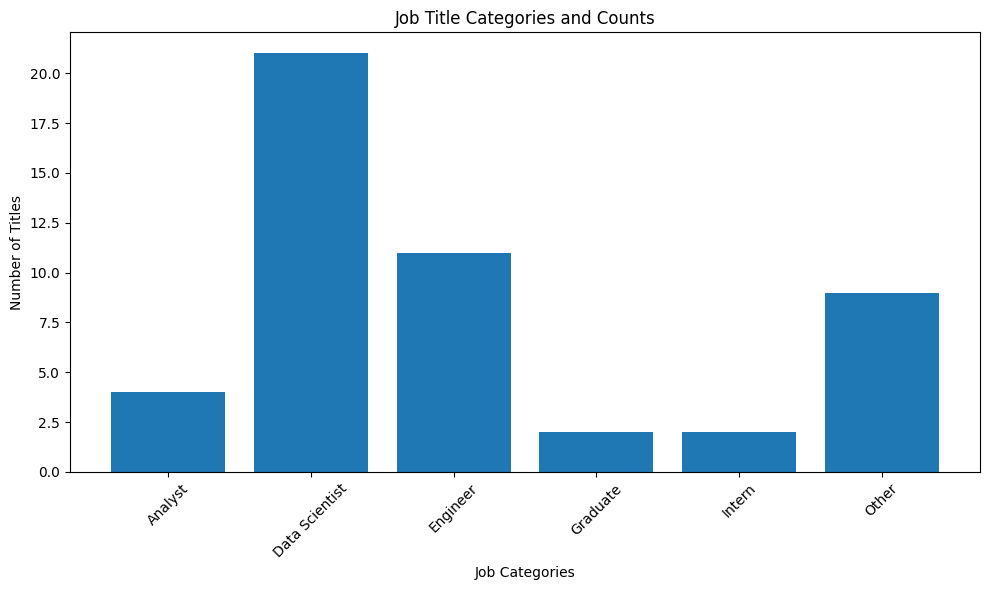

In [ ]:
import matplotlib.pyplot as plt
# counts of job titles in each category
category_counts = {category: len(titles) for category, titles in title_category_dict.items()}

#  bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values())

# labels and title
plt.xlabel('Job Categories')
plt.ylabel('Number of Titles')
plt.title('Job Title Categories and Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**INSIGHT:**

It is appeared that roles related to Data scientist are high in demand. Titles like Data Scientist, Machine Learning Engineer,  and Senior Data Scientist suggest strong demand for professionals in these fields.

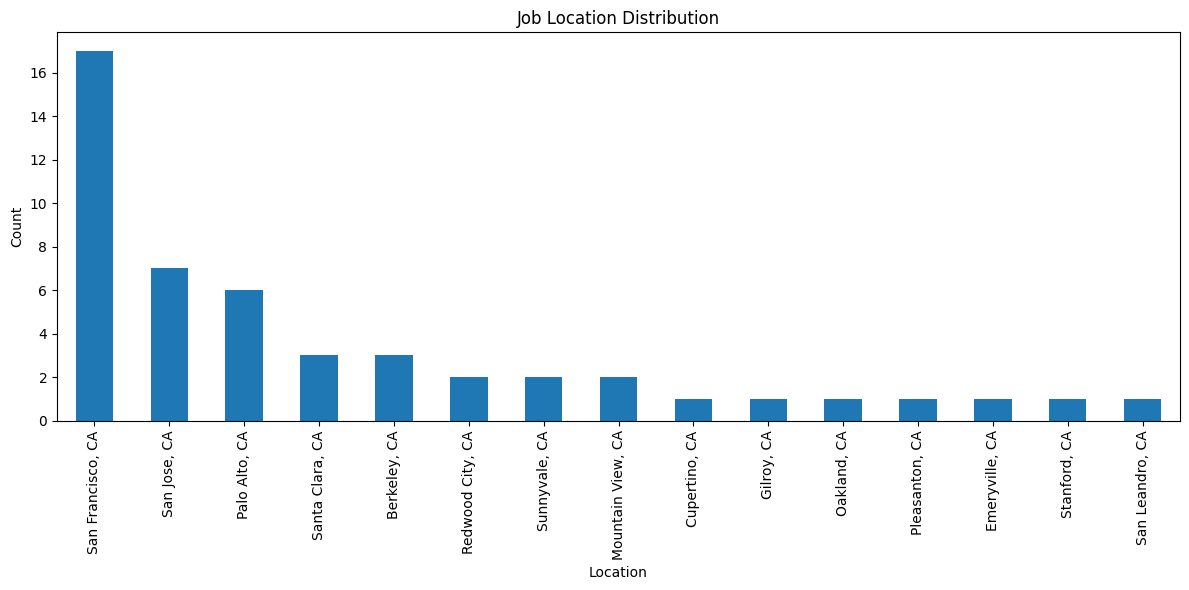

In [ ]:
# Count the number of job postings in each location
location_counts = df['Location'].value_counts()

# bar chart to visualize job location distribution
plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Job Location Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**INSIGHT:**

In this analysis, examined the distribution of job postings across various locations. The main findings reveal that San Francisco, CA, and San Jose, CA, are the prominent hubs for job opportunities, while several other cities in California also have a notable presence in the job market. These insights highlight the significance of these regions in the job landscape, indicating a strong demand for talent in the tech and business sectors. These findings can be valuable for job seekers and businesses looking to understand the current job market dynamics in these areas

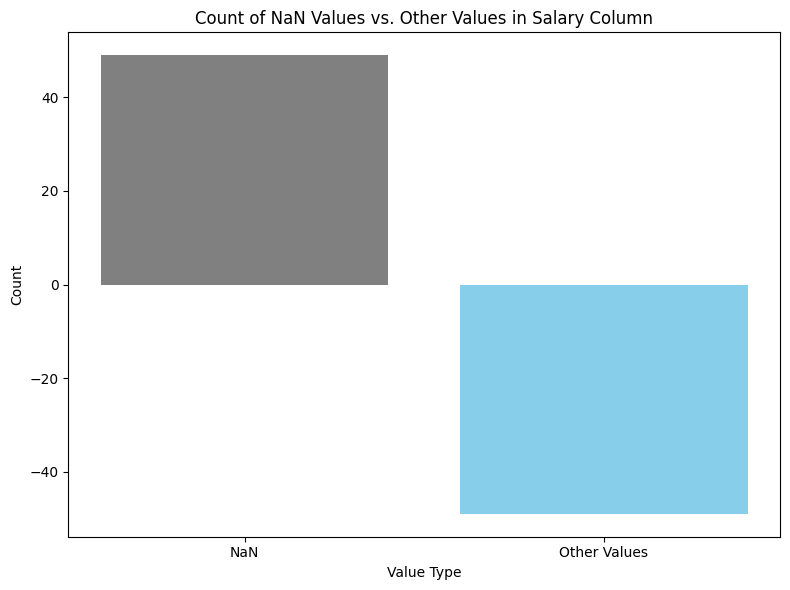

In [ ]:
# Count NaN and non-NaN values
nan_count = df['Salary'].isna().sum()
other_count = df['Salary'].count() - nan_count

# bar chart to show the count of NaN and other values
plt.figure(figsize=(8, 6))
plt.bar(['NaN', 'Other Values'], [nan_count, other_count], color=['gray', 'skyblue'])
plt.xlabel('Value Type')
plt.ylabel('Count')
plt.title('Count of NaN Values vs. Other Values in Salary Column')
plt.tight_layout()
plt.show()

**INSIGHT**

The Salary column in the dataset contains numerous missing values marked as NaN and among the available salary data, a bimodal distribution suggests potential salary disparities. To conduct meaningful analysis or modeling, addressing missing and inconsistent data is essential.

In [ ]:
import re
# regular expression pattern to match qualifications
qualification_pattern = r'(Ph\.D\.|Master\'s degree|Data Scientist|Software Engineer|Data Analyst)'

# Extract qualifications from the 'Description' column
df['Qualifications'] = df['Description'].apply(lambda x: re.findall(qualification_pattern, x))

print(df['Qualifications'])

0                                                    []
1                                                    []
2                                                    []
3                                                    []
4                      [Data Scientist, Data Scientist]
5                                      [Data Scientist]
6                                                    []
7                                                    []
8                                                    []
9                                                    []
10                                                   []
11                                                   []
12    [Data Scientist, Master's degree, Data Scientist]
13                                                   []
14     [Data Scientist, Data Scientist, Data Scientist]
15                                                   []
16                                     [Data Scientist]
17                     [Data Scientist, Data Sci

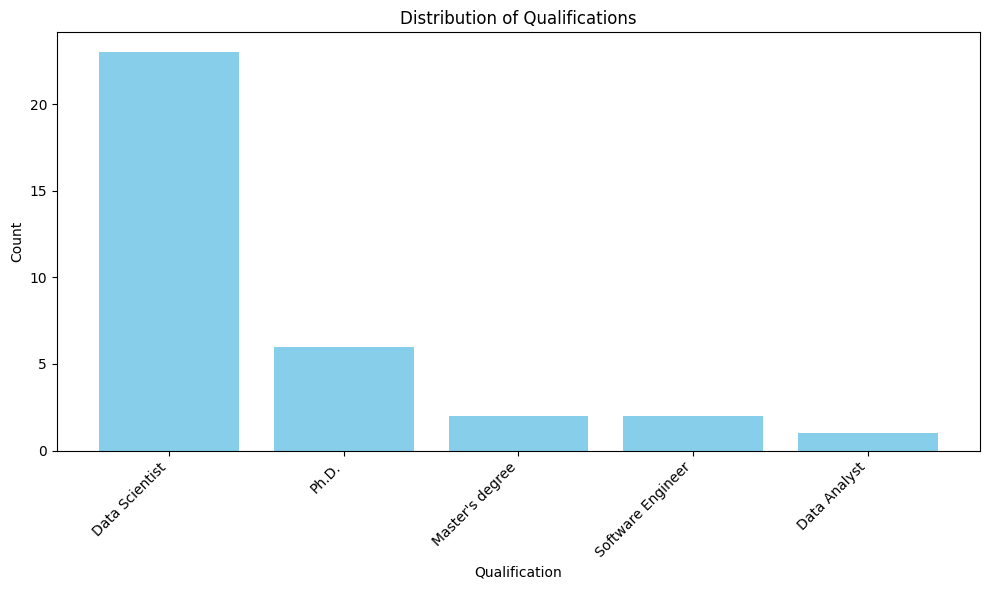

In [ ]:
# Flatten the Qualifications lists into individual qualifications
all_qualifications = [qualification for sublist in df['Qualifications'] for qualification in sublist]

# Count the occurrences of each qualification
qualification_counts = pd.Series(all_qualifications).value_counts().reset_index()
qualification_counts.columns = ['Qualification', 'Count']

#bar chart to show the distribution of qualifications
plt.figure(figsize=(10, 6))
plt.bar(qualification_counts['Qualification'], qualification_counts['Count'], color='skyblue')
plt.xlabel('Qualification')
plt.ylabel('Count')
plt.title('Distribution of Qualifications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**INSIGHT:**

It is appeared that qualification in data scientist is more demanding for most of the job profile followed by Ph.D.

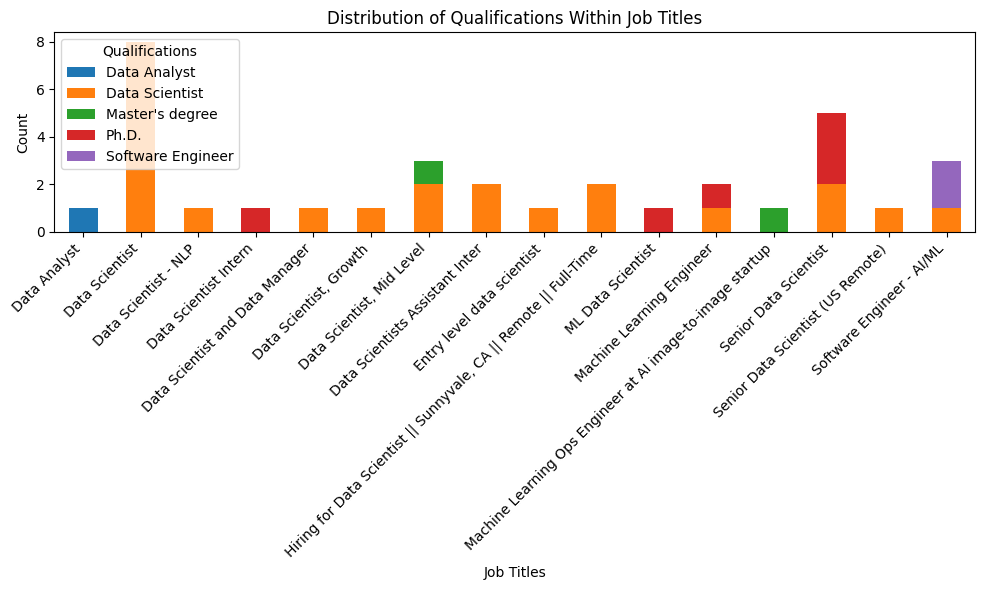

In [ ]:
# Flatten the 'Qualifications' lists into individual qualifications
all_qualifications = [qualification for sublist in df['Qualifications'] for qualification in sublist]

# Count the occurrences of each qualification within each job title
qualification_counts = df.explode('Qualifications').groupby(['Title', 'Qualifications']).size().unstack(fill_value=0)

# Stacked bar chart to show the distribution of qualifications within each job title
fig, ax = plt.subplots(figsize=(10, 6))

qualification_counts.plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.title('Distribution of Qualifications Within Job Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Qualifications')
plt.tight_layout()
plt.show()

**INSIGHT:**

stacked bar chart illustrating the distribution of qualifications within job titles provides a clear view of the qualifications  in DATA SCIENTIST demand most job roles.

In [ ]:
# Regular expression pattern to match skills (customize as needed)
skill_pattern = r'(Python|Java|C\+\+|machine learning|data analysis|statistical modeling)'

# Extract skills from the Description column
df['Skills'] = df['Description'].apply(lambda x: re.findall(skill_pattern, x))

print(df['Skills'])

0                                      [Python, Python]
1                                    [machine learning]
2     [data analysis, machine learning, statistical ...
3                                              [Python]
4                        [data analysis, data analysis]
5                                              [Python]
6     [data analysis, machine learning, Python, data...
7                  [machine learning, machine learning]
8        [machine learning, data analysis, Python, C++]
9     [Python, Python, Python, Java, machine learnin...
10                                       [Python, Java]
11                   [machine learning, Python, Python]
12    [data analysis, machine learning, Python, data...
13      [data analysis, machine learning, Python, Java]
14                   [Python, machine learning, Python]
15                                             [Python]
16    [Python, Java, Java, Java, Java, C++, Java, Py...
17                                             [

In [ ]:

skill_counts = {}

# Flatten the list of skills and count their occurrences
all_skills = [skill for sublist in df['Skills'] for skill in sublist]

for skill in all_skills:
    if skill not in skill_counts:
        skill_counts[skill] = 1
    else:
        skill_counts[skill] += 1

# Sort skills by their first appearance
sorted_skills = sorted(skill_counts.items(), key=lambda x: all_skills.index(x[0]))

# Separate skills and their counts
skills, counts = zip(*sorted_skills)
for skill, count in zip(skills, counts):
    print(f"Skill: {skill}, Count: {count}")


Skill: Python, Count: 55
Skill: machine learning, Count: 71
Skill: data analysis, Count: 24
Skill: statistical modeling, Count: 4
Skill: C++, Count: 5
Skill: Java, Count: 15


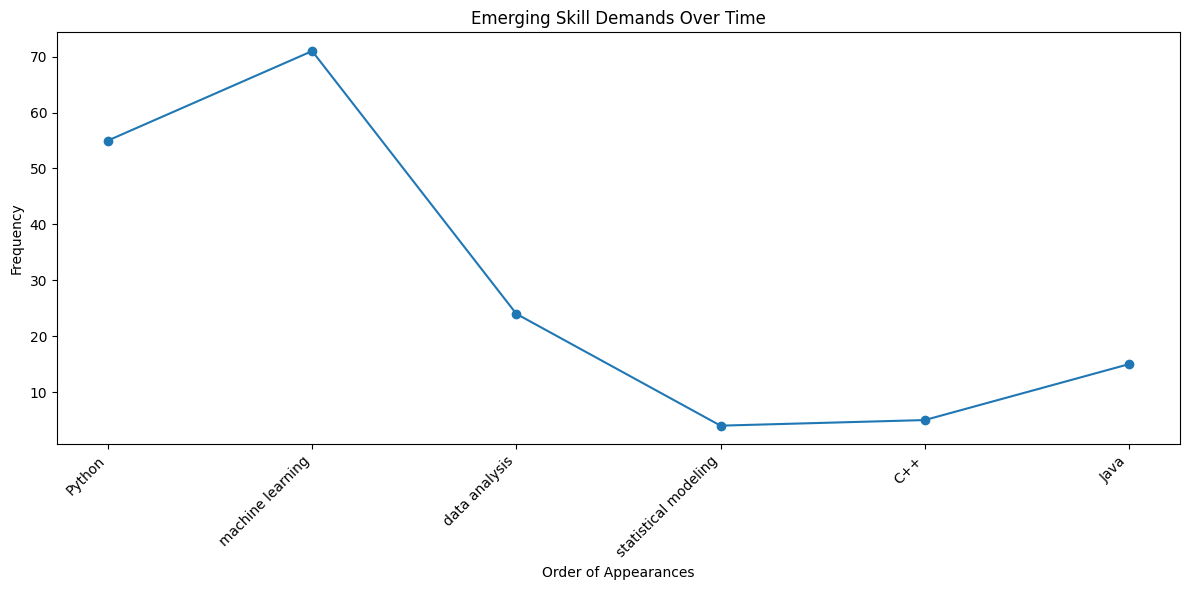

In [ ]:
# line chart to visualize skill demands over time
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(skills) + 1), counts, marker='o', linestyle='-')
plt.xlabel('Order of Appearances')
plt.ylabel('Frequency')
plt.title('Emerging Skill Demands Over Time')
plt.xticks(range(1, len(skills) + 1), skills, rotation=45, ha='right')
plt.tight_layout()
plt.show()

**INSIGHT:**

Python and machine learning skills are in high demand, with Python mentioned 55 times and machine learning 71 times in job descriptions. Data analysis is also sought after, with 24 mentions. Emerging skills like C++ and Java are on the radar, highlighting diverse opportunities in the job market

**CONCLUSION:**

From above dataframe it is clear that Data Scientist have most of the demand in market. Qualification required for Data Science is relatively high. San Fransisco, CA location is quiet busy place for job profile availibity. PYTHON and MACHINE LEARNING are highly demanding skill over time. On website it is observed that most of profile are describe not well, most of profile having Null values for salary. Theres need to upload all info about profile.  